# Orders - Multivariate Regression of  the `review_score`

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from orders.preprocess import whitespace_remover_and_columns

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [97]:
orders = pd.read_csv("Datasets/tablon_primario.csv")
orders_copy = orders.copy()
orders = whitespace_remover_and_columns(orders)


Let's recall our simple analysis from yesterday's exercise: 

¿ A qué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

<Axes: >

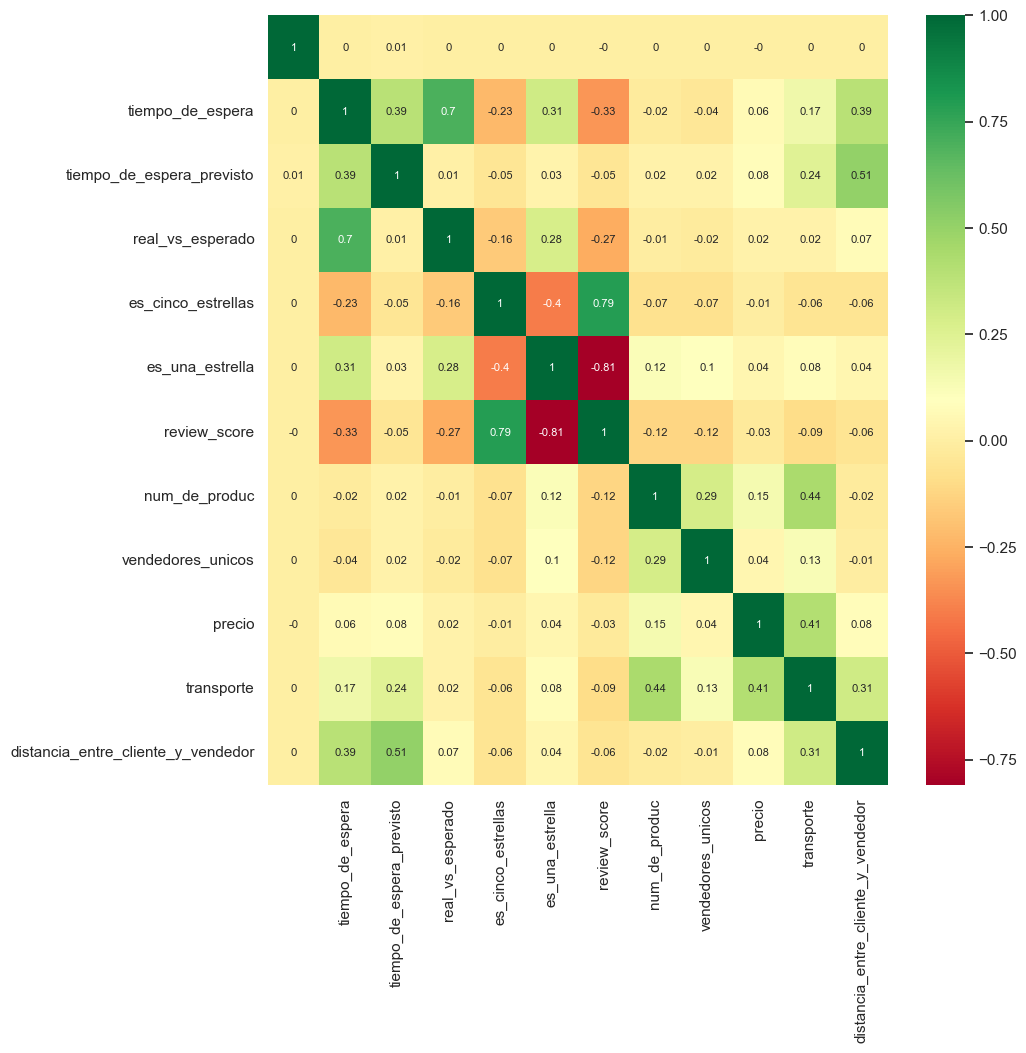

In [98]:
plt.figure(figsize = (10, 10))
sns.heatmap(
    round(orders.corr(numeric_only=True),2), 
    cmap = 'RdYlGn', 
    annot = True, 
    annot_kws = {"size": 8}
)

#### **Correlación de Review Score** 
 Negativas:
 - es_una_estrella: es la variable que más negativamente se correlaciona con el score de reviews.
 - real_vs_esperado: la diferencia entre la entrega estimada de pedidos y la real impacta negativamente en el score de reviews, menos que el ser una     estrella.
 - tiempo_de_espera: por encima de la diferencia de dias entre tiempo de entrega real y esperado, se correlaciona negativamente con el review_score.
 
 Positivas:
 -   es_cinco_estrellas: la única variable que impacta muy positivamente a la review_score.

## 1 - **Regresión Univariada**

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

***Modelo 1***:

In [99]:
import statsmodels.formula.api as smf
model1 = smf.ols('review_score ~ tiempo_de_espera', data=orders).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:11:23   Log-Likelihood:            -1.5439e+05
No. Observations:               95857   AIC:                         3.088e+05
Df Residuals:                   95855   BIC:                         3.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7237      0.006  

Utilizando como b1 el tiempo de espera se observan las siguientes conclusiones:
 ##### → El 11% de las variaciones en el review score de Olist se deben a las variaciones del tiempo de espera. El restante 89% de las variaciones del score de reviews se explica con otras variables que no se tomaron en cuenta para el modelo en cuestión.

 #### → Si no hubiese tiempo de espera, el review score 4.7, casi perfecto y cinco estrellas.

 #### → Por cada día más de tiempo de espera, el review score disminuye 0.04 (en pie con la correlación negativa de seaborn entre dichas características).

 #### → Teniendo un p - value igual a cero, es extremadamente baja la posibilidad de ver un estadístico t de tamaño grande por casualidad.

 #### → Teniendo un estadístico t de 109.74, se puede afirmar que una estimación del coeficiente es altamante significativa, dicho t-value es muy grande respecto a cero.

 #### → El intervalo de confianza no incluye cero, el tiempo de espera tiene un efecto negativo significativo en el score de las reviews, ratificando el intervalo con un 95% de confianza de que esté entre -0.046 y -0.045.

***Modelo 2***:

In [100]:
import statsmodels.formula.api as smf
model2 = smf.ols('review_score ~ real_vs_esperado', data=orders).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:11:23   Log-Likelihood:            -1.5637e+05
No. Observations:               95857   AIC:                         3.127e+05
Df Residuals:                   95855   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2121      0.004  

Utilizando como b1 el tiempo de espera se observan las siguientes conclusiones:
 - El 7,4% de las variaciones en el review score de Olist se deben a las variaciones del tiempo esperado vs. el real.
 - Si se entregasen las ordenes en el mismo día que se estimaban entregar, el review score sería 4.2.
 - Por cada día más de diferencia entre lo estimado y lo real, el review score disminuye 0.07 (correlación negativa).

## **Hallazgos** 
 + Las variaciones de review score se deben más a las variaciones en el tiempo de espera que en las diferencias entre lo real y estimado.
 + De no haber tiempo de espera, el review score es mayor que si no hubiese diferencia entre lo real y esperado.
 + El review score se ve más afectado negativamente por la diferencia entre lo real y esperado que por tardar más días. 



##### → *R-cuadrado* = 0.074. Indica que solamente el 7,4% de la variación de la variable dependiente (review_score) es explicada por la variable independiente (real_vs_esperado). El otro 92,6% de la variación de la variable dependiente (review_score) es explicada por otras variables que no están incluidas en el modelo.

##### → *Coeficientes de regresión individuales*. El coeficiente negativo de real_vs_esperado indica que a medida que aumenta el tiempo de espera real, el review_score tiende a disminuir. El coeficiente de real_vs_esperado es -0.0752, lo que significa que por cada aumento de 1 en real_vs_esperado, el review_score disminuye en 0.0752.
 
##### → *t-values'*. La estadística t para este coeficiente sigue siendo grande. Es de -87.76, lo que indica que la estimación del coeficiente es altamente significativa.

##### → *p-values*. El p - value es cero, es improbable que nuestra variable independiente no tenga efecto medido por nuestro modelo por casualidad

##### → *Intervalos de confianza del 95%*. Para este coeficiente el intervalo de confianza del 95% es de -0.077   a   -0.073. No incluye cero, lo que apoya aún más la conclusión de que tiempo_de_espera_real tiene un efecto negativo significativo sobre review_score.

## 2 - Multivariate regression

a. ¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? 
 + **-0.0205** 


b. ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado`?
 + **tiempo_de_espera** (-0.0383< -0.0205)

***Modelo 3***:

In [101]:
model3 = smf.ols('review_score ~ real_vs_esperado + tiempo_de_espera', data=orders).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6193.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:11:23   Log-Likelihood:            -1.5424e+05
No. Observations:               95857   AIC:                         3.085e+05
Df Residuals:                   95854   BIC:                         3.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6504      0.008  

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [102]:
orders.columns

Index(['', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'time_delta_compra_y_venta',
       'tiempo_de_espera', 'tiempo_de_espera_previsto', 'real_vs_esperado',
       'es_cinco_estrellas', 'es_una_estrella', 'review_score',
       'num_de_produc', 'vendedores_unicos', 'precio', 'transporte',
       'distancia_entre_cliente_y_vendedor'],
      dtype='object')

In [103]:
features = ['tiempo_de_espera', 'real_vs_esperado','num_de_produc','vendedores_unicos', 'precio','transporte','distancia_entre_cliente_y_vendedor']

In [104]:
from scipy.stats import zscore
df_modelo_4 = orders.copy()
df_modelo_4[features] = df_modelo_4[features].apply(zscore)
df_modelo_4.head()

,,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta_compra_y_venta,...,tiempo_de_espera_previsto,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distancia_entre_cliente_y_vendedor
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,...,15.544063,-0.161781,0,0,4,-0.264603,-0.112554,-0.513784,-0.652018,-0.978986
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,...,19.137766,-0.161781,0,0,4,-0.264603,-0.112554,-0.086646,0.000447,0.429687
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,...,26.639711,-0.161781,1,0,5,-0.264603,-0.112554,0.111732,-0.164063,-0.145329
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,...,26.188819,-0.161781,1,0,5,-0.264603,-0.112554,-0.441511,0.206782,2.053937
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,...,12.112049,-0.161781,1,0,5,-0.264603,-0.112554,-0.562367,-0.652018,-0.958634


Crear el `modelo4`

In [105]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + num_de_produc + vendedores_unicos + precio + transporte + distancia_entre_cliente_y_vendedor'

In [106]:
model4 = smf.ols(formula, data=df_modelo_4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2323.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:11:24   Log-Likelihood:            -1.5255e+05
No. Observations:               95857   AIC:                         3.051e+05
Df Residuals:                   95849   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
  + El rendimiento general de la regresión fue mejor que el anterior (3). El R cuadrado, que explica las variaciones de review_score combinando las variaciones de las features seleccionadas, aumentó con respecto el mencionado. Es un 0.031 mayor.
- ¿Es esta regresión estadísticamente significativa?
  + Esta regresión es estadísticamente significativa ya que el la probabilidad del F-Statistic es menor a 0.005

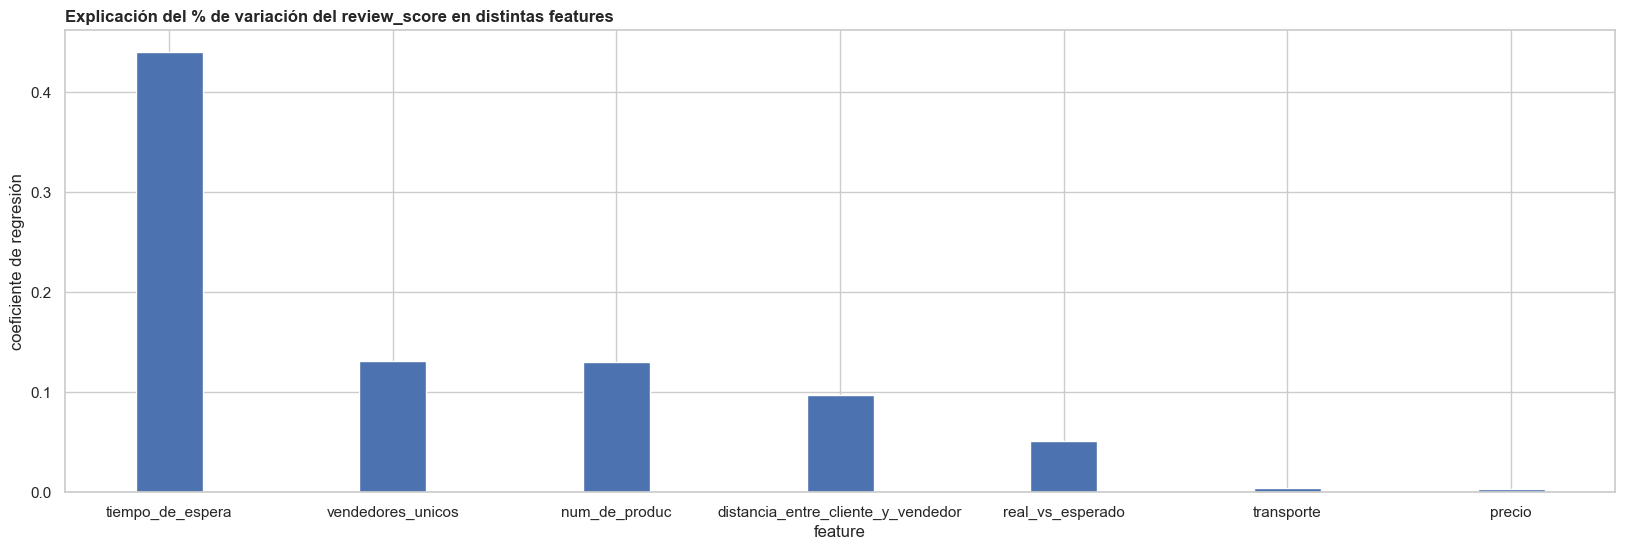

In [107]:
coeficientes = abs(model4.params.drop('Intercept'))
coeficientes_ordenados = coeficientes.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(coeficientes_ordenados.index, coeficientes_ordenados, width=0.3)
ax.set_xlabel('feature')
ax.set_ylabel('coeficiente de regresión')
ax.set_title('Explicación del % de variación del review_score en distintas features', loc='left',fontweight="bold")
plt.show()


- ¿Cual es la variable que más impacto tiene?
    **tiempo_de_espera** es la variable que más impacto tiene en el review_score ya que tiene el coeficiente más negativo.
- qué pasa con productos y vendedores cuando hay más?
    **Disminuye el review score**, ambos tienen coeficientes negativos y de similar magnitud.
- Que pasa con la distancia?
    **Aumenta el review_score** si la orden se entrega más lejos, tiene un coeficiente de 0.9 positivo.
- Que pasa con precio y transporte?
     A medida que el precio va aumentando, el review_score también y cuanto mayor es el precio del flete, también el review_score también aumenta.
     De todas maneras, ambos tienen p - values mayores a 0.05. En precio, por ejemplo, quiere decir que hay un 48,9% de probabilidad que dicha variable NO tenga efecto en la variable dependeiente review_score, por eso nuestros resultados son producidos por chance. Lo mismo con transporte pero con 38,5%.
- Qué pasa con F-statistics y p-value?
    Ambos analizados en su conjunto funcionan como un "térmometro" del modelo: aquí hay un F - statistic alto y un  p - value chico (menor a 0.05), ergo, es una señal de que el modelo es útil.
- Analizar R cuadrado
    Un R-cuadrado de 0.145 con 7 variables independientes sugiere que el modelo tiene un poder limitado para explicar la variabilidad en la variable dependiente. Solo el 14.5% de la variabilidad de review_score se explica con las variables actuales, lo que indica que es necesario explorar otras variables o considerar un modelo diferente para mejorar la capacidad predictiva. Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

### Residuos

In [108]:
# reviews_predicted = model4.predict(df_modelo_4['review_score']) Se intentó resolver de esta manera, no funcionó, puede ser la correcta?
n=95849
reviews_predicted = model4.predict()
reviews_predicted

array([4.30634778, 4.19573555, 4.34291267, ..., 3.70558401, 3.72896706,
       4.44326392])

In [109]:
residuos = reviews_predicted - orders['review_score']
residuos

0        0.306348
1        0.195736
2       -0.657087
3       -0.618111
4       -0.432611
           ...   
95852   -0.674814
95853   -0.259423
95854   -1.294416
95855    1.728967
95856   -0.556736
Name: review_score, Length: 95857, dtype: float64

## Computación de RMS

In [110]:
RMS = np.sqrt(((np.array(orders['review_score']) - np.array(reviews_predicted))**2).mean())
print("RMSE:", RMS)

RMSE: 1.1883148948154865


In [111]:
residuals_df = pd.DataFrame(residuos)

Plotear los resultados

Text(0.5, 0, 'Review_score')

<Figure size 1000x1000 with 0 Axes>

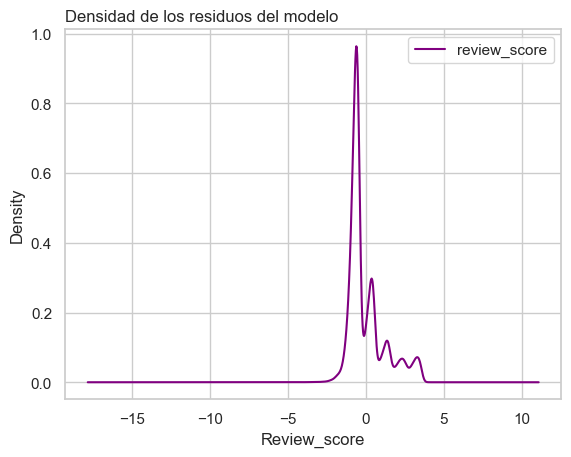

In [112]:
plt.figure(figsize=(10,10))
residuals_df.plot.density(color='purple')
plt.title('Densidad de los residuos del modelo', loc='left')
plt.xlabel('Review_score')

In [113]:
residuals_df['review_score'].unique()

array([ 0.30634778,  0.19573555, -0.65708733, ..., -1.29441599,
        1.72896706, -0.55673608])

* ¿Por qué la trama residual tiene una forma tan extraña? Hay residuos negativos. Se están sobreestimando los valores.

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

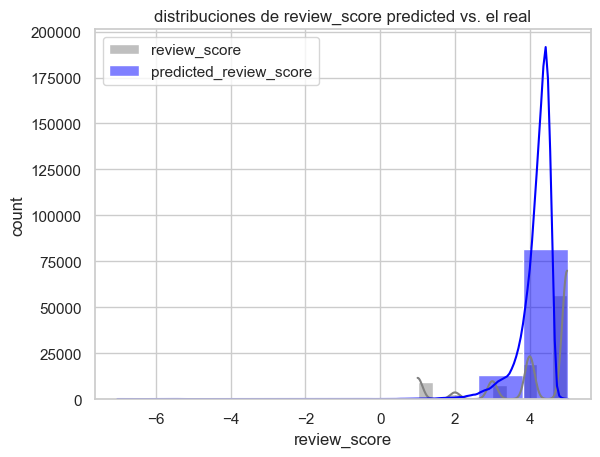

In [114]:
fig, ax = plt.subplots()
sns.histplot(data=orders['review_score'], kde=True,bins=10 ,color='grey', label='review_score')
sns.histplot(data=reviews_predicted,kde=True,bins=10, color='blue', label='predicted_review_score')
plt.xlabel('review_score')
plt.ylabel('count')
plt.title('distribuciones de review_score predicted vs. el real')
plt.legend()
plt.show()


C:\Users\juanf\AppData\Local\Temp\ipykernel_15092\3769057116.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(orders['review_score'], label='review_score', color='grey', shade=True)


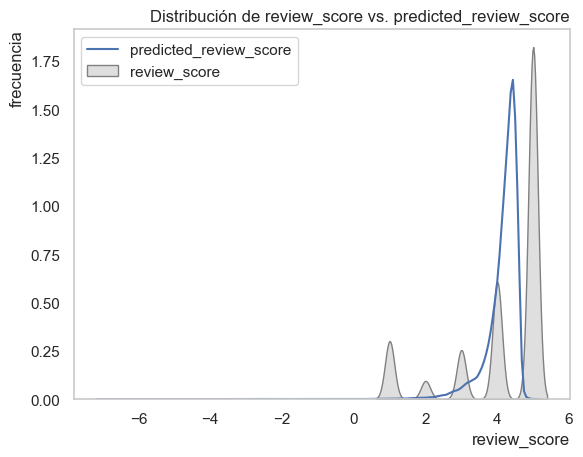

In [115]:
sns.kdeplot(reviews_predicted, label='predicted_review_score')
sns.kdeplot(orders['review_score'], label='review_score', color='grey', shade=True)
sns.set_style('whitegrid')
plt.xlabel('review_score', loc='right')
plt.ylabel('frecuencia', loc='top')
plt.title('Distribución de review_score vs. predicted_review_score', loc='right')
plt.legend()
plt.grid(False)
plt.show()

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

c:\Users\juanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


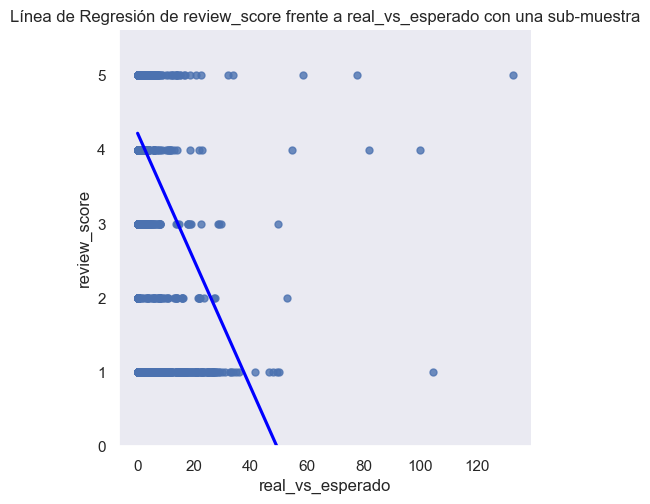

In [116]:
sub_muestra = orders.sample(n=9000, random_state=42)
sns.set(style="darkgrid")
plot = sns.lmplot(x="real_vs_esperado", y="review_score", data=sub_muestra, ci=0.95, scatter_kws={"s": 25}, line_kws={"color": "blue"})
plot.set(ylim=(0, None))
plt.title("Línea de Regresión de review_score frente a real_vs_esperado con una sub-muestra")
plt.grid(False, axis='both')
plt.show()

c:\Users\juanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


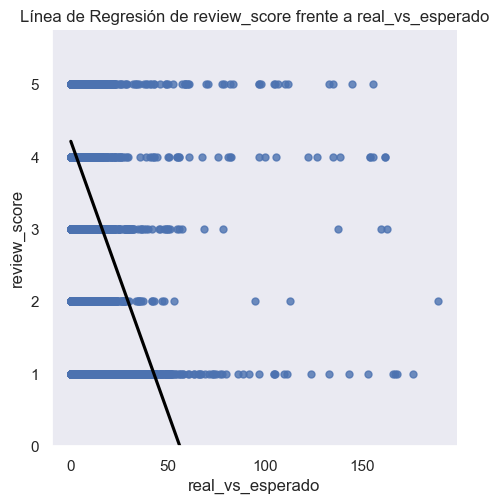

In [117]:
sns.set(style="darkgrid")
plot = sns.lmplot(x="real_vs_esperado", y="review_score", data=orders, ci=0.95, scatter_kws={"s": 25}, line_kws={"color": "black"})
plot.set(ylim=(0, None))
plt.title("Línea de Regresión de review_score frente a real_vs_esperado")
plt.grid(False, axis='both')
plt.show()